In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print('size: ', df.shape)

ordinal_quality_values = df['quality'].unique()
ordinal_quality_values.sort()
print('Quality values: ', ordinal_quality_values)  # actual scale 1-10

df.head()

size:  (4898, 12)
Quality values:  [3 4 5 6 7 8 9]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
# choose models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error
from mord import LogisticAT

# instantiate models
model_linear = LinearRegression()
model_1vR = LogisticRegression(multi_class='ovr', class_weight='balanced')
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

# divide df into features matrix and target vector
#features = df.iloc[:, :-1]  #all except quality
#target = df['quality']

# model fitting
#model_linear.fit(features, target)
#model_1vR.fit(features, target)
#model_multi.fit(features, target)
#model_ordinal.fit(features, target)

# model evaluation
#target_linear_fit = model_linear.predict(features)
#target_1vR_fit = model_1vR.predict(features)
#target_multi_fit = model_multi.predict(features)
#target_ordinal_fit = model_ordinal.predict(features)

#print('Mean absolute error:' )
#print('Linear Regression: ', mean_absolute_error(target, target_linear_fit))
#print('Logistic Regression (1 versus rest): ', mean_absolute_error(target, target_1vR_fit))
#print('Logistic Regression (multinomial): ', mean_absolute_error(target, target_multi_fit))
#print('Ordinal logistic regression: ', mean_absolute_error(target, target_ordinal_fit))

Mean absolute error:
Linear Regression:  0.5836349500279401
Logistic Regression (1 versus Rest):  0.7978766843609637
Logistic Regression (Multiclass):  1.7564311964066965
Ordinal logistic regression:  0.527970600244998


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear, features, target, 
                                                  cv=folds,
                                                  scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR, features, target, 
                                                  cv=folds,
                                                  scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi, features, target, 
                                                  cv=folds,
                                                  scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal, features, target, 
                                                  cv=folds,
                                                  scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.5937976390149522
Logistic regression (one versus rest):  0.878373224226371
Logistic regression (multiclass):  1.6912050915561436
Ordinal logistic regression:  0.5461289112171938


In [4]:
'''from sklearn.metrics import f1_score

def F1_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return f1_score(target_true, target_fit, average='weighted')
    
F1 = make_scorer(F1_fun)
folds = 5

print('F1_score:' )
print('Linear regression: ', np.mean(cross_val_score(model_linear, features, target, 
                                                  cv=folds,
                                                  scoring=F1)))
print('Logistic regression (one versus rest): ', np.mean(cross_val_score(model_1vR, features, target, 
                                                  cv=folds,
                                                  scoring=F1)))
print('Logistic regression (multinomial): ', np.mean(cross_val_score(model_multi, features, target, 
                                                  cv=folds,
                                                  scoring=F1)))
print('Ordered logistic regression: ', np.mean(cross_val_score(model_ordinal, features, target, 
                                                  cv=folds,
                                                  scoring=F1)))
'''

"from sklearn.metrics import f1_score\n\ndef F1_fun(target_true, target_fit):\n    target_fit = np.round(target_fit)\n    target_fit.astype('int')\n    return f1_score(target_true, target_fit, average='weighted')\n    \nF1 = make_scorer(F1_fun)\nfolds = 5\n\nprint('F1_score:' )\nprint('Linear regression: ', np.mean(cross_val_score(model_linear, features, target, \n                                                  cv=folds,\n                                                  scoring=F1)))\nprint('Logistic regression (one versus rest): ', np.mean(cross_val_score(model_1vR, features, target, \n                                                  cv=folds,\n                                                  scoring=F1)))\nprint('Logistic regression (multiclass): ', np.mean(cross_val_score(model_multi, features, target, \n                                                  cv=folds,\n                                                  scoring=F1)))\nprint('Ordinal logistic regression: ', np.mean(cro

In [5]:
from sklearn.metrics import accuracy_score

def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)
    
acc = make_scorer(acc_fun)
folds = 5

print('Accuracy:' )
acc_linear = cross_val_score(model_linear, features, target, 
                                                  cv=folds,
                                                  scoring=acc)
print('Linear regression: ', np.mean(acc_linear))
acc_1vR = cross_val_score(model_1vR, features, target, 
                                                  cv=folds,
                                                  scoring=acc)
print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
acc_multi = cross_val_score(model_multi, features, target, 
                                                  cv=folds,
                                                  scoring=acc)
print('Logistic regression (multinomial): ', np.mean(acc_multi))
acc_ordinal = cross_val_score(model_ordinal, features, target, 
                                                  cv=folds,
                                                  scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

Accuracy:
Linear regression:  0.5065412436680494
Logistic regression (one versus rest):  0.4087836694873818
Logistic regression (multiclass):  0.17129729286134823
Ordinal ligistic regression:  0.5134839799045257


## Visualization

In [6]:
def nuss_style_fun(ax, title):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=16)
    
    return ax

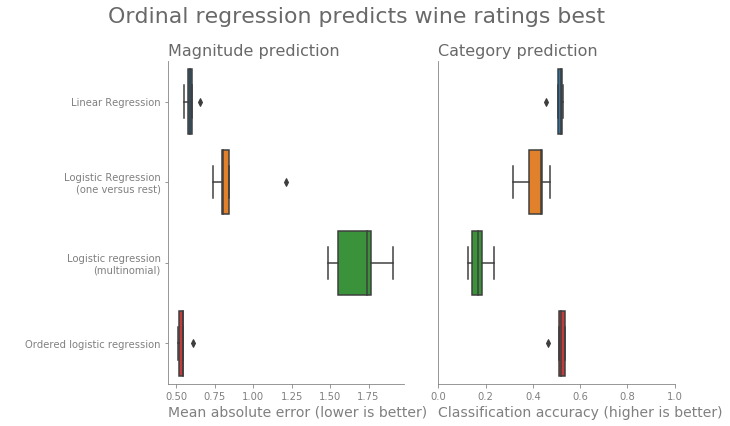

In [58]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=[10, 6])
fig.suptitle('Ordinal regression predicts wine ratings best\n\n',
            color='dimgrey',
             size=22)

axs[0] = nuss_style_fun(ax=axs[0], title='\n\nMagnitude prediction')

sns.boxplot(y=['Linear Regression', 'Logistic Regression\n(one versus rest)', 'Logistic regression\n(multinomial)', 'Ordered logistic regression'],
            x=[MAE_linear, MAE_1vR, MAE_multi, MAE_ordinal], ax=axs[0])
axs[0].set(xlabel='Mean absolute error (lower is better)',
      ylabel=' ')

axs[1] = nuss_style_fun(ax=axs[1], title='\n\nCategory prediction')

sns.boxplot(y=['Linear Regression', 'Logistic Regression\n(one versus rest)', 'Logistic regression\n(multinomial)', 'Ordered logistic regression'],
            x=[acc_linear, acc_1vR, acc_multi, acc_ordinal], ax=axs[1])
axs[1].set(xlabel='Classification accuracy (higher is better)',
      ylabel=' ',
      xlim=[0, 1])
axs[1].get_yaxis().set_ticks([])

fig.tight_layout()
fig.savefig('wine_ratings_model_accuracy.png')

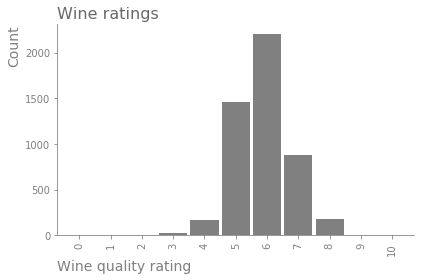

In [50]:
fig, ax = plt.subplots()
ax=nuss_style_fun(ax, title='Wine ratings')

counts = pd.crosstab(index=df['quality'],
           columns='count')
for i in range(11):
    #print(i)
    if i not in counts.index:
        #print('not', i)
        counts.loc[i, 'count']=0
counts = counts.sort_index()

counts.plot(kind='bar',
            color='grey',
            legend=False,
            width=0.9,
            ax=ax)

ax.set(xlabel='Wine quality rating',
      ylabel='Count')

fig.tight_layout()
fig.savefig('wine_ratings.png')